In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
boston = load_boston()

In [3]:
features = pd.DataFrame(boston.data, columns=boston.feature_names)
target = pd.DataFrame(boston.target, columns=['TARGET'])

In [4]:
data = pd.concat([features, target], axis=1)

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [7]:
X = data['RM']
Z = data['LSTAT']
Y = data['TARGET']

In [8]:
x = np.array(X/X.mean())
z = np.array(Z/Z.mean())
y = np.array(Y/Y.mean())

In [9]:
x_train, x_test, z_train, z_test, y_train, y_test = train_test_split(x,z,y,test_size = 0.2)

In [10]:
def hypothesis(a,b,c,x,z):
    return  a * np.power(x, 3) + b * x + c

In [11]:
def error(a,b,c,x,z,y):
    e = 0
    m = len(x)
    for i in range(m):
        e += np.power((hypothesis(a,b,c,x[i],z[i]) - y[i]), 2)
    
    return (1/(2*m)) * e

In [12]:
def step_gradient(a,b,c,x,z,y,learning_rate):
    grad_a = 0
    grad_b = 0
    grad_c = 0
    m = len(x)
    for i in range(m):
        grad_a += 1/m * (hypothesis(a,b,c,x[i],z[i]) - y[i]) * np.power(x[i],3)
        grad_b += 1/m * (hypothesis(a,b,c,x[i],z[i]) - y[i]) * x[i]
        grad_c += 1/m * (hypothesis(a,b,c,x[i],z[i]) - y[i])
        
    a = a - (grad_a * learning_rate)
    b = b - (grad_b * learning_rate)
    c = c - (grad_c * learning_rate)
    
    return a, b, c

In [13]:
def descend(initial_a, initial_b, initial_c, x, z, y, learning_rate, iterations):
    a = initial_a
    b = initial_b
    c = initial_c
    for i in range(iterations):
        e = error(a, b, c, x, z, y)
        if i % 1000 == 0:
            print(f"Error: {e}, a: {a}, b: {b}, c: {c}")
        
        a, b, c = step_gradient(a, b, c, x, z, y, learning_rate)

    return a, b, c

In [23]:
a = 0
b = 1
c = 1
learning_rate = 0.0005
iterations = 10000

final_a, final_b, final_c = descend(final_a, final_b, final_c, z_train, z_train, y_train, learning_rate, iterations)


Error: 0.03141676949833169, a: 0.06867981211448344, b: -0.9354762571552946, c: 1.7902027492387809
Error: 0.03141676949833169, a: 0.06867981211448344, b: -0.9354762571552946, c: 1.7902027492387809
Error: 0.03141676949833169, a: 0.06867981211448344, b: -0.9354762571552946, c: 1.7902027492387809
Error: 0.03141676949833169, a: 0.06867981211448344, b: -0.9354762571552946, c: 1.7902027492387809
Error: 0.03141676949833169, a: 0.06867981211448344, b: -0.9354762571552946, c: 1.7902027492387809
Error: 0.03141676949833169, a: 0.06867981211448344, b: -0.9354762571552946, c: 1.7902027492387809
Error: 0.03141676949833169, a: 0.06867981211448344, b: -0.9354762571552946, c: 1.7902027492387809
Error: 0.03141676949833169, a: 0.06867981211448344, b: -0.9354762571552946, c: 1.7902027492387809
Error: 0.03141676949833169, a: 0.06867981211448344, b: -0.9354762571552946, c: 1.7902027492387809
Error: 0.03141676949833169, a: 0.06867981211448344, b: -0.9354762571552946, c: 1.7902027492387809


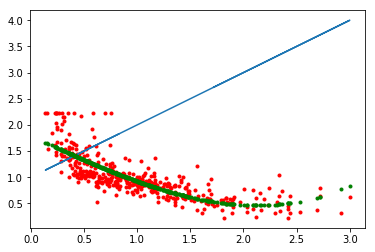

In [22]:
plt.plot(z_train,y_train,'r.',
         z_train,hypothesis(a,b,c,z_train,z_train),
         z_train,hypothesis(final_a,final_b,final_c,z_train,z_train),"g.")